In [1]:

import kagglehub
bhavikjikadara_mental_health_dataset_path = kagglehub.dataset_download('bhavikjikadara/mental-health-dataset')

print('Data source import complete.')


100%|██████████| 1.95M/1.95M [00:00<00:00, 39.9MB/s]

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

from category_encoders import LeaveOneOutEncoder, TargetEncoder

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc
)

import warnings
warnings.filterwarnings("ignore")


In [11]:
df = pd.read_csv("Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [12]:
df.shape


(292364, 17)

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [14]:
df.duplicated().sum()


np.int64(2313)

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df.isnull().sum()


,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5193
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [17]:
df.dropna(inplace=True)


In [18]:
le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["self_employed"] = le.fit_transform(df["self_employed"])
df["family_history"] = le.fit_transform(df["family_history"])
df["treatment"] = le.fit_transform(df["treatment"])
df["Coping_Struggles"] = le.fit_transform(df["Coping_Struggles"])

In [19]:
data = pd.get_dummies(data=df, columns=["Occupation", "Days_Indoors", "Growing_Stress",
            "Changes_Habits", "Mental_Health_History", "Work_Interest", "Social_Weakness",
            "mental_health_interview", "care_options"])

data = pd.get_dummies(data=data, columns=["Mood_Swings"])

In [20]:
data.drop("Timestamp", axis=1, inplace=True)
data

,Gender,Country,self_employed,family_history,treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,...,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes,Mood_Swings_High,Mood_Swings_Low,Mood_Swings_Medium
3,0,United States,0,1,1,0,False,True,False,False,...,True,True,False,False,False,False,True,False,False,True
4,0,United States,0,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True
5,0,Poland,0,0,1,0,False,True,False,False,...,True,True,False,False,False,True,False,False,False,True
6,0,Australia,0,1,1,0,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
7,0,United States,0,0,0,0,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,United States,1,1,1,1,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
292360,1,South Africa,0,1,1,1,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
292361,1,United States,0,1,0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
292362,1,United States,0,1,1,1,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [21]:
leave_encoder = LeaveOneOutEncoder()
data["Country"] = leave_encoder.fit_transform(data["Country"], data.iloc[:, -3])

<class 'pandas.core.frame.DataFrame'>
Index: 284858 entries, 3 to 292363
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           284858 non-null  int64  
 1   Country                          284858 non-null  float64
 2   self_employed                    284858 non-null  int64  
 3   family_history                   284858 non-null  int64  
 4   treatment                        284858 non-null  int64  
 5   Coping_Struggles                 284858 non-null  int64  
 6   Occupation_Business              284858 non-null  bool   
 7   Occupation_Corporate             284858 non-null  bool   
 8   Occupation_Housewife             284858 non-null  bool   
 9   Occupation_Others                284858 non-null  bool   
 10  Occupation_Student               284858 non-null  bool   
 11  Days_Indoors_1-14 days           284858 non-null  bool   
 12  Days_In

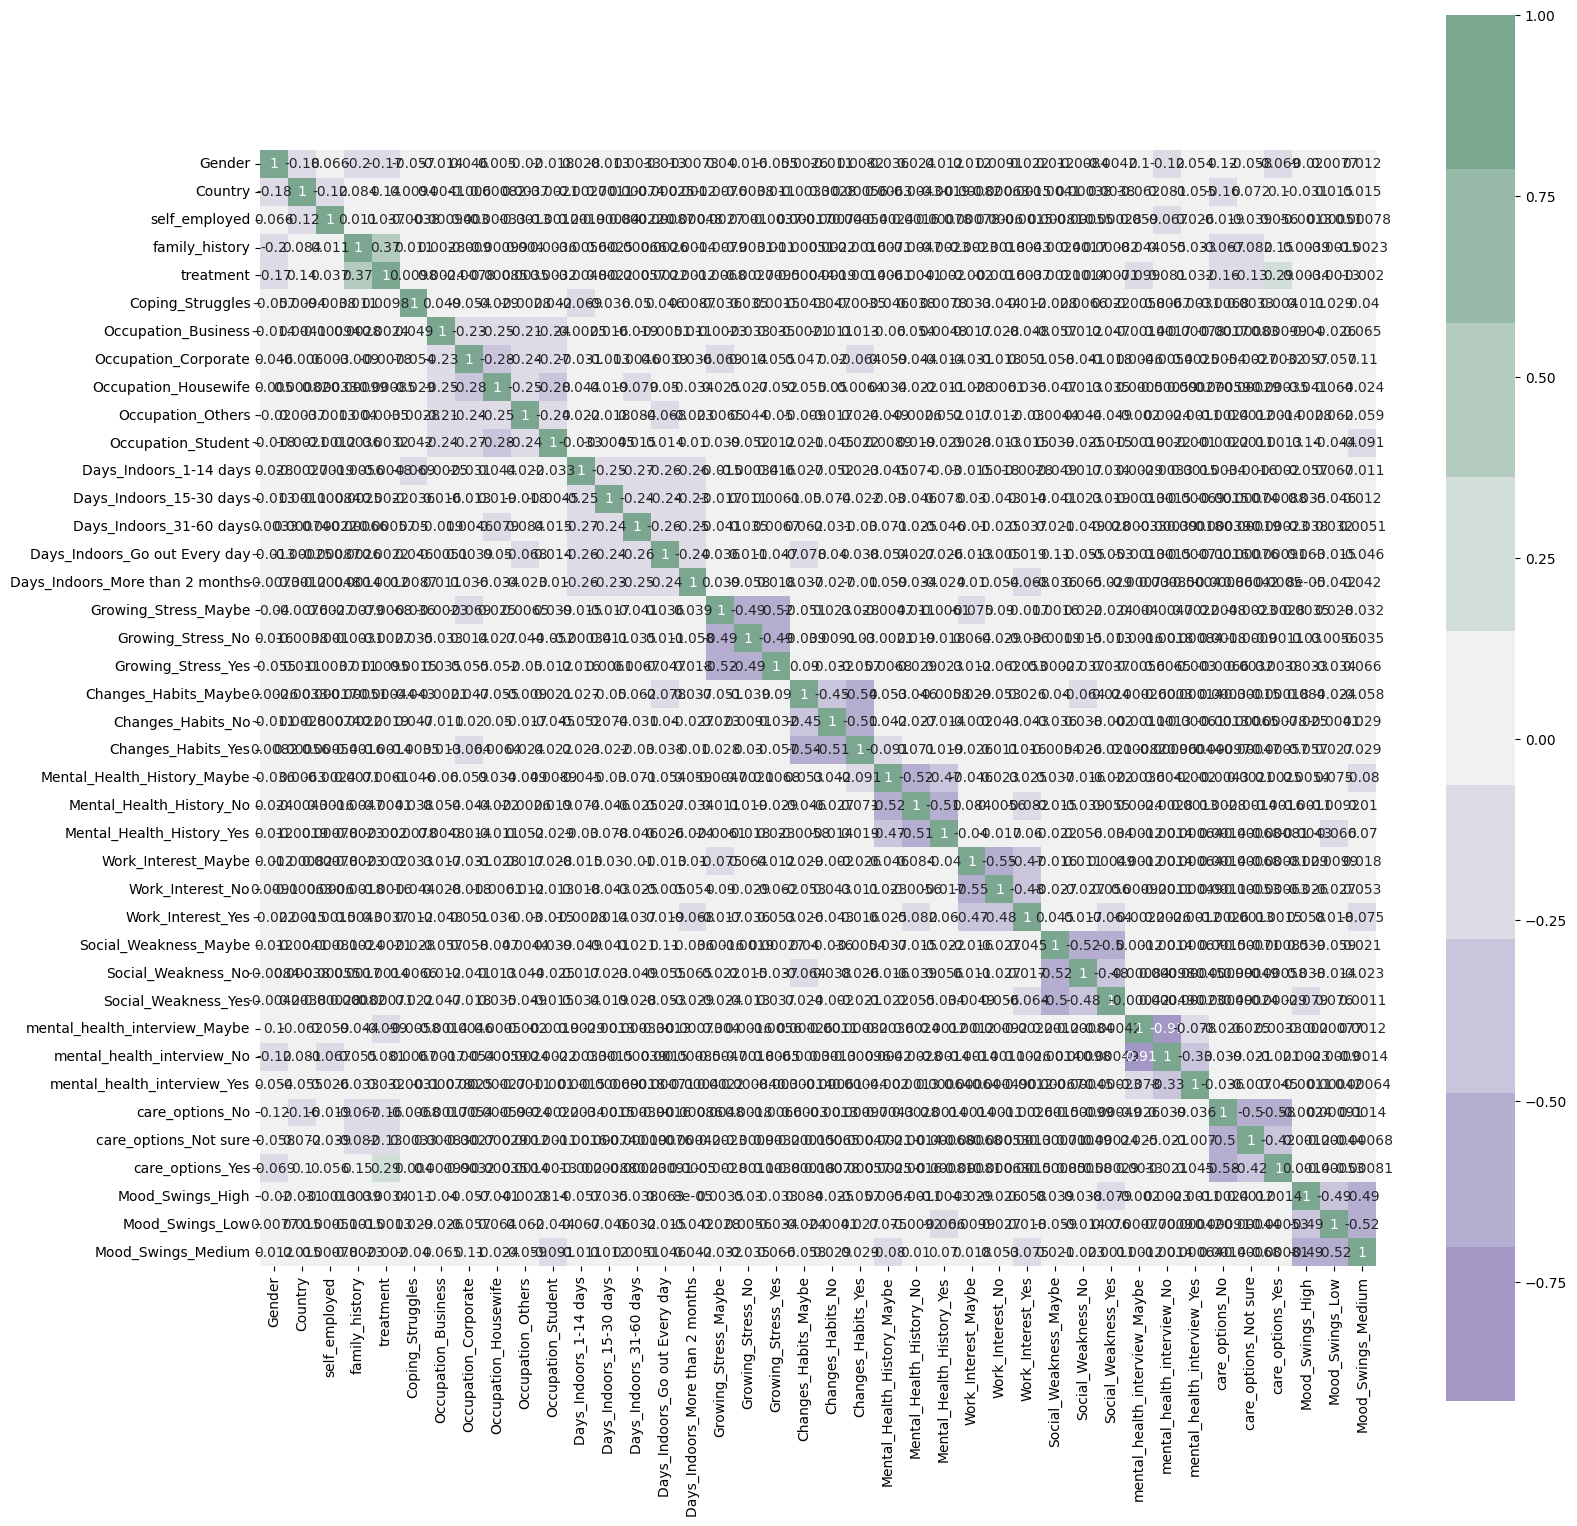

In [22]:
data.info()
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [23]:
y = data.iloc[:, -3:]
X = data.drop(data.iloc[:, -3:], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [24]:
X.shape


(284858, 37)

In [25]:

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [26]:
model_list = [LinearSVC(), LogisticRegression(), GradientBoostingClassifier(),
              AdaBoostClassifier(), HistGradientBoostingClassifier()]

roc_auc_list = []
accuracy_list = []

for model in model_list:
    multi_class = MultiOutputClassifier(model, n_jobs=-1)
    for i in data.iloc[:, -3:]:
        multi_class.fit(X_train, y_train[[i]])
        y_pred = multi_class.predict(X_test)
        roc_auc = roc_auc_score(y_test[i], y_pred)
        accuracy = accuracy_score(y_test[[i]], y_pred)

        roc_auc_list.append(roc_auc)
        accuracy_list.append(accuracy)

In [27]:
accuracy_df = pd.DataFrame(accuracy_list, columns=["value"])
roc_auc_df = pd.DataFrame(roc_auc_list, columns=["value"])

In [28]:
list_models = ["LinearSVC", "LogisticRegression", "GradientBoostingClassifier",
               "AdaBoostClassifier", "HistGradientBoostingClassifier"]

In [29]:
accuracy_averages = [accuracy_df.value[:3].mean(), accuracy_df.value[3:6].mean(), accuracy_df.value[6:9].mean(),
                    accuracy_df.value[9:12].mean(), accuracy_df.value[12:15].mean()]

roc_auc_averages = [roc_auc_df.value[:3].mean(), roc_auc_df.value[3:6].mean(), roc_auc_df.value[6:9].mean(),
                    roc_auc_df.value[9:12].mean(), roc_auc_df.value[12:15].mean()]

avarage_df = pd.DataFrame(accuracy_averages, columns=["accuracy_mean"], index=list_models)
avarage_df["roc_auc_mean"] = roc_auc_averages

In [30]:
avarage_df.head()


,accuracy_mean,roc_auc_mean
LinearSVC,0.677705,0.533700
LogisticRegression,0.678376,0.538568
GradientBoostingClassifier,0.887641,0.866949
AdaBoostClassifier,0.769497,0.687597
HistGradientBoostingClassifier,0.991352,0.990297


In [31]:
roc_auc_list = []
accuracy_list = []

hist_class = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1)
print("HistGradientBoostingClassifier SELECTED MODEL\n")

for i in data.iloc[:,-3:].columns:
    hist_class.fit(X_train, y_train[[i]])
    y_pred = hist_class.predict(X_test)
    roc_auc = roc_auc_score(y_test[[i]], y_pred)
    accuracy = accuracy_score(y_test[[i]], y_pred)

    roc_auc_list.append(roc_auc)
    accuracy_list.append(accuracy)

    print(f'Category name: {i}')
    print(f'{i} AUC ROC score is: {roc_auc:.3f}')
    print(f"accuracy score is: {accuracy:.3f}")
    print("\n", "-" * 50)

HistGradientBoostingClassifier SELECTED MODEL

Category name: Mood_Swings_High
Mood_Swings_High AUC ROC score is: 1.000
accuracy score is: 1.000

 --------------------------------------------------
Category name: Mood_Swings_Low
Mood_Swings_Low AUC ROC score is: 0.990
accuracy score is: 0.989

 --------------------------------------------------
Category name: Mood_Swings_Medium
Mood_Swings_Medium AUC ROC score is: 0.986
accuracy score is: 0.988

 --------------------------------------------------


In [32]:
k = 1
l = 2
i = 0
j = 3
for model_name in list_models:

    print(f"Accuracy scores of categories with {model_name}: {accuracy_df.value[i:j].mean()}")

    print(f"Roc_auc_scores of categories with {model_name}: {roc_auc_df.value[i:j].mean()}")

    plt.tight_layout()

Accuracy scores of categories with LinearSVC: 0.6777052275191712
Roc_auc_scores of categories with LinearSVC: 0.5336998107038782
Accuracy scores of categories with LogisticRegression: 0.6777052275191712
Roc_auc_scores of categories with LogisticRegression: 0.5336998107038782
Accuracy scores of categories with GradientBoostingClassifier: 0.6777052275191712
Roc_auc_scores of categories with GradientBoostingClassifier: 0.5336998107038782
Accuracy scores of categories with AdaBoostClassifier: 0.6777052275191712
Roc_auc_scores of categories with AdaBoostClassifier: 0.5336998107038782
Accuracy scores of categories with HistGradientBoostingClassifier: 0.6777052275191712
Roc_auc_scores of categories with HistGradientBoostingClassifier: 0.5336998107038782


<Figure size 640x480 with 0 Axes>

In [33]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

model_list = [LinearSVC(), LogisticRegression(), GradientBoostingClassifier(),
              AdaBoostClassifier(), HistGradientBoostingClassifier()]

roc_auc_list = []
accuracy_list = []

for model in model_list:
    multi_class = MultiOutputClassifier(model, n_jobs=-1)
    for i in data.iloc[:, -3:]:
        multi_class.fit(X_train, y_train[[i]])
        y_pred = multi_class.predict(X_test)
        roc_auc = roc_auc_score(y_test[i], y_pred)
        accuracy = accuracy_score(y_test[[i]], y_pred)

        roc_auc_list.append(roc_auc)
        accuracy_list.append(accuracy)

In [34]:
accuracy_df = pd.DataFrame(accuracy_list, columns=["value"])
roc_auc_df = pd.DataFrame(roc_auc_list, columns=["value"])
list_models = ["LinearSVC", "LogisticRegression", "GradientBoostingClassifier",
               "AdaBoostClassifier", "HistGradientBoostingClassifier"]

In [35]:
accuracy_averages = [accuracy_df.value[:3].mean(), accuracy_df.value[3:6].mean(), accuracy_df.value[6:9].mean(),
                    accuracy_df.value[9:12].mean(), accuracy_df.value[12:15].mean()]

roc_auc_averages = [roc_auc_df.value[:3].mean(), roc_auc_df.value[3:6].mean(), roc_auc_df.value[6:9].mean(),
                    roc_auc_df.value[9:12].mean(), roc_auc_df.value[12:15].mean()]

avarage_df = pd.DataFrame(accuracy_averages, columns=["accuracy_mean"], index=list_models)
avarage_df["roc_auc_mean"] = roc_auc_averages

In [ ]:
average_df.head()


In [37]:
hist_high = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1).fit(X_train, y_train[["Mood_Swings_High"]])
hist_low = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1).fit(X_train, y_train[["Mood_Swings_Low"]])
hist_medium = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1).fit(X_train, y_train[["Mood_Swings_Medium"]])

pred_high = hist_high.predict(X_test)
pred_low = hist_low.predict(X_test)
pred_medium = hist_medium.predict(X_test)

In [38]:
# Mood Swings (High)
print(classification_report(y_test["Mood_Swings_High"], pred_high))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     58948
        True       1.00      1.00      1.00     26510

    accuracy                           1.00     85458
   macro avg       1.00      1.00      1.00     85458
weighted avg       1.00      1.00      1.00     85458



In [39]:
cm_high = confusion_matrix(y_test["Mood_Swings_High"], pred_high)
cm_low = confusion_matrix(y_test["Mood_Swings_Low"], pred_low)
cm_medium = confusion_matrix(y_test["Mood_Swings_Medium"], pred_medium)

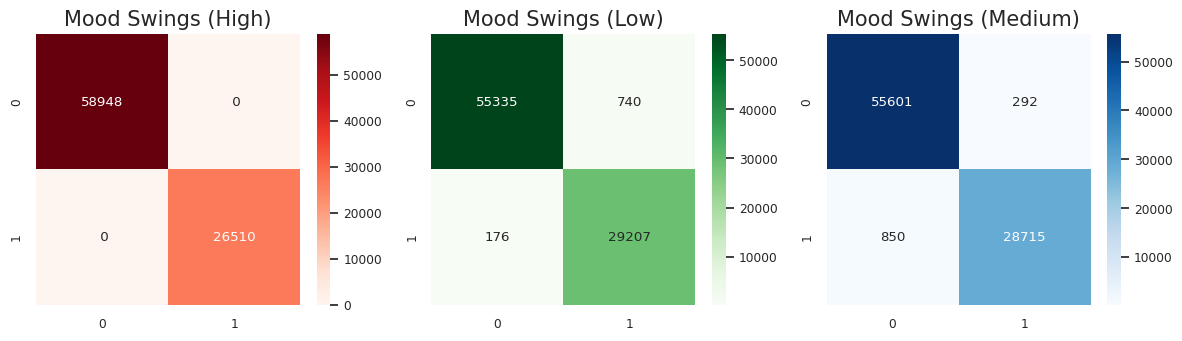

In [40]:
plt.figure(figsize=(12,3.5))
sns.set(font_scale=0.8)
plt.subplot(1,3,1)
sns.heatmap(cm_high, annot=True, fmt='2g', cmap="Reds")
plt.title("Mood Swings (High)", fontsize=15)
plt.subplot(1,3,2)
sns.heatmap(cm_low, annot=True, fmt='2g', cmap="Greens")
plt.title("Mood Swings (Low)", fontsize=15)
plt.subplot(1,3,3)
sns.heatmap(cm_medium, annot=True, fmt='2g', cmap="Blues")
plt.title("Mood Swings (Medium)", fontsize=15)
plt.tight_layout()
plt.show()

In [41]:
y_prob_high = hist_high.predict_proba(X_test)[0][:, 1]
y_prob_low = hist_low.predict_proba(X_test)[0][:, 1]
y_prob_medium = hist_medium.predict_proba(X_test)[0][:, 1]

fpr_h, tpr_h, thresholds_h = roc_curve(y_test["Mood_Swings_High"], y_prob_high)
fpr_l, tpr_l, thresholds_l = roc_curve(y_test["Mood_Swings_Low"], y_prob_low)
fpr_m, tpr_m, thresholds_m = roc_curve(y_test["Mood_Swings_Medium"], y_prob_medium)

roc_auc_h = auc(fpr_h, tpr_h)
roc_auc_l = auc(fpr_l, tpr_l)
roc_auc_m = auc(fpr_m, tpr_m)

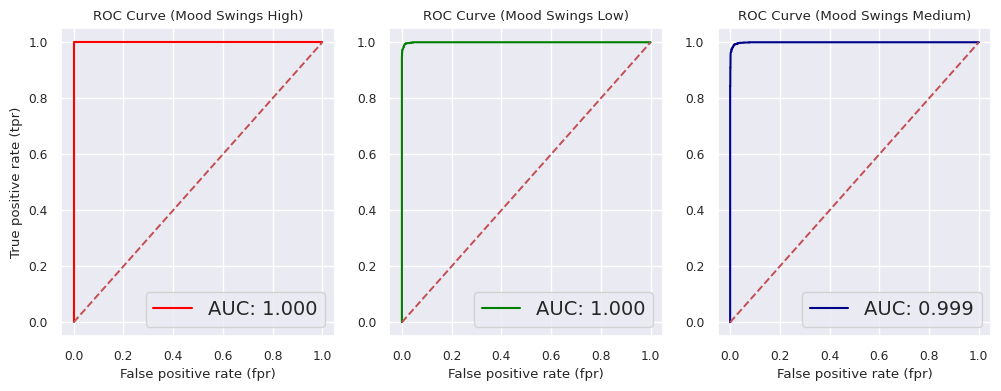

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(fpr_h, tpr_h, color="red", label= f"AUC: {roc_auc_h:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("ROC Curve (Mood Swings High)")
plt.subplot(1,3,2)
plt.plot(fpr_l, tpr_l, color="Green", label= f"AUC: {roc_auc_l:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.title("ROC Curve (Mood Swings Low)")
plt.subplot(1,3,3)
plt.plot(fpr_m, tpr_m, color="darkblue", label= f"AUC: {roc_auc_m:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.title("ROC Curve (Mood Swings Medium)")
plt.show()

In [43]:
data.shape


(284858, 40)

# *ANN*

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [46]:


# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Early Stopping
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

# Model Architecture
model = Sequential()
model.add(Dense(37, activation='relu', input_dim=X_train.shape[1]))  # Increase neurons
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))

# Output Layer
model.add(Dense(3, activation='sigmoid'))  # Use 'softmax' if labels are exclusive

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for exclusive labels
              metrics=['accuracy'])



In [48]:

# Train Model
history = model.fit(
    X_train_scaled, y_train,
    batch_size=64, epochs=50,
    callbacks=[early_stopping],
    validation_split=0.2,
    class_weight={0: 1, 1: 2, 2: 2}  # Adjust if labels are imbalanced
)

Epoch 1/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8313 - loss: 0.3573 - val_accuracy: 0.9059 - val_loss: 0.1408
Epoch 2/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8318 - loss: 0.3531 - val_accuracy: 0.9045 - val_loss: 0.1377
Epoch 3/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8324 - loss: 0.3552 - val_accuracy: 0.9035 - val_loss: 0.1403
Epoch 4/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8322 - loss: 0.3544 - val_accuracy: 0.9032 - val_loss: 0.1386
Epoch 5/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8318 - loss: 0.3558 - val_accuracy: 0.9066 - val_loss: 0.1378
Epoch 6/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8308 - loss: 0.3538 - val_accuracy: 0.9043 - val_loss: 0.1410
Epoch 7/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8346 - loss: 0.3463 - val_accuracy: 0.9044 - val_loss: 0.1391
Epoch 8/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8338 - loss: 0

In [49]:

# Evaluate Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9133 - loss: 0.1303
Test Accuracy: 0.9134


#  Using gredient decent  ( Backpropagation )

In [50]:
from keras.optimizers import SGD
import tensorflow as tf

# Use SGD with momentum for stable updates
optimizer = SGD(learning_rate=0.01, momentum=0.9)


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:

# Define the Model
model = Sequential([
    Dense(37, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(3, activation='sigmoid')  # Use 'softmax' if labels are exclusive
])


In [53]:

# Define Loss Function and Optimizer (SGD for manual backpropagation)
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Custom Training Loop
epochs = 20
batch_size = 64

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).batch(batch_size)

for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0

    for X_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True)
            loss = loss_fn(y_batch, y_pred)  # Compute loss

        gradients = tape.gradient(loss, model.trainable_variables)  # Compute gradients
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # Update weights

        epoch_loss += loss.numpy()

        # Compute Accuracy (Fix Type Mismatch)
        y_pred_labels = tf.round(y_pred)  # Convert probabilities to 0 or 1
        correct_predictions += tf.reduce_sum(tf.cast(tf.equal(y_pred_labels, tf.cast(y_batch, tf.float32)), tf.float32)).numpy()
        total_samples += tf.size(y_batch).numpy()  # Total number of labels

    epoch_accuracy = correct_predictions / total_samples  # Multi-label accuracy
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")



Epoch 1/20, Loss: 1839.3580, Accuracy: 0.6898
Epoch 2/20, Loss: 1383.5031, Accuracy: 0.7865
Epoch 3/20, Loss: 1122.2483, Accuracy: 0.8334
Epoch 4/20, Loss: 997.7828, Accuracy: 0.8554
Epoch 5/20, Loss: 935.0822, Accuracy: 0.8658
Epoch 6/20, Loss: 900.2957, Accuracy: 0.8716
Epoch 7/20, Loss: 869.6619, Accuracy: 0.8757
Epoch 8/20, Loss: 844.8082, Accuracy: 0.8795
Epoch 9/20, Loss: 830.0587, Accuracy: 0.8815
Epoch 10/20, Loss: 824.9431, Accuracy: 0.8825
Epoch 11/20, Loss: 800.8547, Accuracy: 0.8866
Epoch 12/20, Loss: 796.3189, Accuracy: 0.8863
Epoch 13/20, Loss: 795.2236, Accuracy: 0.8868
Epoch 14/20, Loss: 782.1334, Accuracy: 0.8887
Epoch 15/20, Loss: 776.9814, Accuracy: 0.8893
Epoch 16/20, Loss: 775.0104, Accuracy: 0.8898
Epoch 17/20, Loss: 767.9468, Accuracy: 0.8903
Epoch 18/20, Loss: 767.5322, Accuracy: 0.8905
Epoch 19/20, Loss: 762.1562, Accuracy: 0.8911
Epoch 20/20, Loss: 752.1168, Accuracy: 0.8924
